<a href="https://colab.research.google.com/github/ua-datalab/DataEngineering/blob/main/02_Workshop_Feb_05_2024_streamlit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q streamlit
!npm install localtunnel
!wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 61.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.8 MB/s eta 0:00:00
npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 2.027s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit 

In [ ]:
!chmod +x cloudflared-linux-amd64
!nohup /content/cloudflared-linux-amd64 tunnel --url http://localhost:8501 &

nohup: appending output to 'nohup.out'


In [ ]:
!grep -o 'https://.*\.trycloudflare.com' nohup.out | head -n 1 | xargs -I {} echo "Your tunnel url {}"

Your tunnel url https://restored-preston-aaa-pj.trycloudflare.com


In [ ]:
%%writefile app.py
import streamlit as st

# Title of the application
st.title('My First ML model deployment')

Writing app.py


In [ ]:
!streamlit run /content/app.py &>/content/logs.txt &

## once it's running you can keep adding text without shuting the app down.



# **Computer Vision Example- Building an Image Classifier with InceptionV3**



# **Lynx**

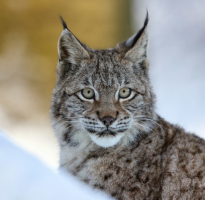



In [ ]:
%%writefile app.py


from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import streamlit as st

# Initialize the InceptionV3 model
model = InceptionV3(weights='imagenet')


def classify_image(img):
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)

    preds = model.predict(img)
    return decode_predictions(preds, top=10)[0]

def main():
    st.title("Image Classification with InceptionV3")
    st.write("Upload an image and the model will classify it into the top 10 categories.")

    uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png", "jpeg"])
    if uploaded_file is not None:
        img = image.load_img(uploaded_file, target_size=(299, 299))
        st.image(img, caption='Uploaded Image', use_column_width=False)
        st.write("")
        st.write("Classifying...")
        labels = classify_image(img)
        for label in labels:
            st.write(f"{label[1]} ({label[2]*100:.2f}%)")
            st.progress(int(label[2] * 100))

if __name__ == '__main__':
    main()

Overwriting app.py


# **Computer Vision Example - Object Detection**

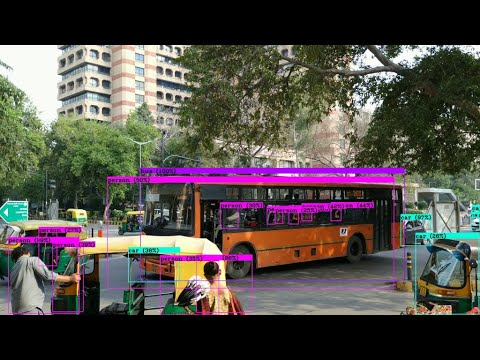

In [ ]:
from IPython.display import YouTubeVideo
vid = YouTubeVideo("3RYYQiYxXUY")
display(vid)

# **Object Detection with FasterRCNN**

In [ ]:
%%writefile app.py

import streamlit as st
import torch
from PIL import Image, ImageDraw, ImageFont
from torchvision import transforms
from torchvision.models.detection import fasterrcnn_resnet50_fpn, FasterRCNN_ResNet50_FPN_Weights
import numpy as np
import colorsys

# Define COCO labels mapping
COCO_LABELS = {
    1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane',    6: 'bus', 7: 'train', 8: 'truck', 9: 'boat', 10: 'traffic light',
    11: 'fire hydrant', 13: 'stop sign', 14: 'parking meter', 15: 'bench',    16: 'bird', 17: 'cat', 18: 'dog', 19: 'horse', 20: 'sheep',
    21: 'cow', 22: 'elephant', 23: 'bear', 24: 'zebra', 25: 'giraffe',    27: 'backpack', 28: 'umbrella', 31: 'handbag', 32: 'tie',
    33: 'suitcase', 34: 'frisbee', 35: 'skis', 36: 'snowboard',    37: 'sports ball', 38: 'kite', 39: 'baseball bat', 40: 'baseball glove',
    41: 'skateboard', 42: 'surfboard', 43: 'tennis racket', 44: 'bottle',    46: 'wine glass', 47: 'cup', 48: 'fork', 49: 'knife', 50: 'spoon',
    51: 'bowl', 52: 'banana', 53: 'apple', 54: 'sandwich', 55: 'orange',    56: 'broccoli', 57: 'carrot', 58: 'hot dog', 59: 'pizza', 60: 'donut',
    61: 'cake', 62: 'chair', 63: 'couch', 64: 'potted plant', 65: 'bed',    67: 'dining table', 70: 'toilet', 72: 'tv', 73: 'laptop', 74: 'mouse',
    75: 'remote', 76: 'keyboard', 77: 'cell phone', 78: 'microwave',    79: 'oven', 80: 'toaster', 81: 'sink', 82: 'refrigerator', 84: 'book',
    85: 'clock', 86: 'vase', 87: 'scissors', 88: 'teddy bear', 89: 'hair drier',    90: 'toothbrush'}


def get_color(label_id):
    # Generate a unique color for each label id based on its hash value
    hue = hash(label_id) % 360  # Limit hue to [0, 360]
    saturation = 90 + hash(label_id) % 10  # Saturation between [90, 100]
    lightness = 50 + hash(label_id) % 10  # Lightness between [50, 60]

    color = colorsys.hls_to_rgb(hue / 360, lightness / 100, saturation / 100)
    # Convert to RGB format as integer tuple
    return tuple(int(c * 255) for c in color)

@st.cache_resource()
def load_model():
    model = fasterrcnn_resnet50_fpn(weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT)
    model.eval()
    return model

model = load_model()

def object_detection(image, model):
    transform = transforms.Compose([
        transforms.ToTensor(),
    ])

    image = transform(image).unsqueeze(0)
    with torch.no_grad():
        prediction = model(image)

    return prediction[0]

def main():
    st.title("Object Detection with FasterRCNN")

    uploaded_file = st.file_uploader("Upload an image", type=["jpg", "png", "jpeg"])
    if uploaded_file is not None:
        image = Image.open(uploaded_file).convert('RGB')
        st.image(image, caption='Uploaded Image', use_column_width=True)

        prediction = object_detection(image, model)

        # Prepare to draw
        draw = ImageDraw.Draw(image)
        # Define font for drawing text
        font_size = 20
        font = ImageFont.load_default()


        for element in range(len(prediction["boxes"])):
            boxes = prediction["boxes"][element].cpu().numpy()
            score = np.round(prediction["scores"][element].cpu().numpy(), decimals=4)
            label_id = int(prediction["labels"][element].cpu().numpy())
            label_name = COCO_LABELS.get(label_id, 'N/A')
            color = get_color(label_id)
            # text_color = (0, 0, 0)  # black color for text
            text_color = (255, 255, 255)  # black color for text

            if score > 0.5:
                label_with_score = f"{label_name}: {score:.2f}"
                draw.rectangle([(boxes[0], boxes[1]), (boxes[2], boxes[3])], outline=color, width=3)
                draw.text((boxes[0], boxes[1] - 10), label_with_score, fill=text_color, font=font)

        st.image(image, caption="Processed Image", use_column_width=True)

if __name__ == '__main__':
    main()





Overwriting app.py


# **Object Detection Applications**


*   **Urban Street Scenes**: Busy city streets with cars, bicycles, pedestrians, traffic lights, and signs. These scenes show how object detection can be used for autonomous driving and traffic monitoring.

*   **Sports Events**: Pictures from sports games with players, balls, goals, and other equipment. These images can demonstrate the use of object detection in sports analytics and player tracking.

*   **Wildlife monitoring and environmental research**: To monitor animal movement

In [ ]:
!pip install -q datasets transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.6 MB/s eta 0:00:00


# **Natural Language Processing - Emotion Detection**

## Multilabel classification problem

## **Please download the model weights and rename it to model.hdf5**

In [ ]:
!wget -L https://www.dropbox.com/scl/fi/svc8wvbl6c5dxwcu3xjw3/model3.h5?rlkey=pe2yn2w1ffrszpc6ex9rgf50m&dl=0

!mv /content/model3.h5?rlkey=pe2yn2w1ffrszpc6ex9rgf50m /content/model.hdf5

--2024-02-05 21:35:22--  https://www.dropbox.com/scl/fi/svc8wvbl6c5dxwcu3xjw3/model3.h5?rlkey=pe2yn2w1ffrszpc6ex9rgf50m
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc50ba4499630398cc8252e4c608.dl.dropboxusercontent.com/cd/0/inline/CMvsdBA4vS8rHgXTX-yB2ti2zzn79QdB9PFN8pj3Qd-HiAba7s974uWzDpGfvapG8xznxeK74QUVwjGvNFjW8V0DXruZW54vN9mz7o5BHHLnUxkDrzfiYvQFblI2Z8GsoxrqcAsKzDMuttiHUWlW9HcY/file# [following]
--2024-02-05 21:35:22--  https://uc50ba4499630398cc8252e4c608.dl.dropboxusercontent.com/cd/0/inline/CMvsdBA4vS8rHgXTX-yB2ti2zzn79QdB9PFN8pj3Qd-HiAba7s974uWzDpGfvapG8xznxeK74QUVwjGvNFjW8V0DXruZW54vN9mz7o5BHHLnUxkDrzfiYvQFblI2Z8GsoxrqcAsKzDMuttiHUWlW9HcY/file
Resolving uc50ba4499630398cc8252e4c608.dl.dropboxusercontent.com (uc50ba4499630398cc8252e4c608.dl.dropboxusercontent.com)... 162.125.3.15, 2620:100:

## Task
### Given a text, predict whether any of the following emotions are present:


*   admiration
*   amusement
*   gratitude
*   love
*   pride
*   relief
*   remorse


For example, given the text:

Thanks for the reply! I appreciate your input. Please keep me in the loop, I’d love to be more active with this if possible.



In [ ]:
%%writefile app.py

def main():
    import streamlit as st
    # from transformers import BertTokenizer, TFBertForSequenceClassification
    from transformers import BertTokenizer, BertModel, TFBertModel
    import tensorflow as tf
    import numpy as np

    emotions = ["admiration","amusement","gratitude","love","pride","relief","remorse"]

    # Load the model and tokenizer
    # model_path = '/content/model3.h5'
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    # model = TFBertForSequenceClassification.from_pretrained(model_path)
    model = tf.keras.models.load_model('/content/model.hdf5', custom_objects={"TFBertModel": TFBertModel})

    def predict_emotion(text):
        test_input_ids=[]
        test_attention_masks=[]
        # for sent in texts_train:
        bert_inp_train=tokenizer.encode_plus(text,add_special_tokens = True,max_length =35,pad_to_max_length = True,return_attention_mask = True, truncation=True)
        test_input_ids.append(bert_inp_train['input_ids'])
        test_attention_masks.append(bert_inp_train['attention_mask'])

        test_input_ids=np.asarray(test_input_ids)
        test_attention_masks=np.array(test_attention_masks)

        # inputs = tokenizer(text, return_tensors="tf", padding=True, truncation=True, max_length=512)
        # outputs = model(inputs)
        # predictions = np.where(model.predict([test_input_ids,test_attention_masks]) > 0.5, 1, 0)

        predictions = model.predict([test_input_ids,test_attention_masks])[0]
        # logits = outputs.logits
        # predicted_class_id = tf.argmax(logits, axis=1).numpy()[0]
        # return model.config.id2label[predicted_class_id]
        return predictions

    # Streamlit interface
    st.title('Emotion Detection in Text using the BERT Model')

    if st.checkbox("Show emotion categories"):
        st.write("Categories:")
        st.write(emotions)
    #st.write("Categories:")
    #st.write(emotions)

    user_input = st.text_area("Enter the text you want to analyze and model would predict emotions.", "")

    if st.button('Analyze'):
        if user_input:
            probabilities = predict_emotion(user_input)
            scaled_probabilities = [int(probability * 100) for probability in probabilities]  # Scale and convert to int
            # st.write(f'Predicted Emotion: {prediction}')
            for emotion, prob_int in zip(emotions, scaled_probabilities):
                st.write(f"{emotion}:")
                st.progress(prob_int)
        else:
            st.write('Please enter some text to analyze.')

if __name__ == '__main__':
    main()



Overwriting app.py


## Sample Text to try:

* kinda and thank you i am curious about those files and film and fotos you mentioned
* thank you so much i love germany i was in berlin years ago for research work
* this is what i am currently dealing with and i am glad i read this nice reminder thank you lol
* i will as soon as i get out of the mental hospital lol thank you for recommending it i love name
* relax ms bi weeb who leans left haha thanks i love it

# **Another NLP example:  Speech to text conversion using openAI whisper model**

### Given an audio sample can the model extract what's the text

In [ ]:
!pip install -q git+https://github.com/openai/whisper.git
!sudo apt update && sudo apt install ffmpeg

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,064 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:7 http://security.ubuntu.com/u

## Let's get a sound sample

In [ ]:
!wget -L https://arizona.box.com/shared/static/nx6j3a8vpgj32orpabc99lmy24ulxexd.mp3

!mv /content/nx6j3a8vpgj32orpabc99lmy24ulxexd.mp3 /content/audiosample.mp3

--2024-02-05 21:43:01--  https://arizona.box.com/shared/static/nx6j3a8vpgj32orpabc99lmy24ulxexd.mp3
Resolving arizona.box.com (arizona.box.com)... 74.112.186.144
Connecting to arizona.box.com (arizona.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/nx6j3a8vpgj32orpabc99lmy24ulxexd.mp3 [following]
--2024-02-05 21:43:01--  https://arizona.box.com/public/static/nx6j3a8vpgj32orpabc99lmy24ulxexd.mp3
Reusing existing connection to arizona.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://arizona.app.box.com/public/static/nx6j3a8vpgj32orpabc99lmy24ulxexd.mp3 [following]
--2024-02-05 21:43:01--  https://arizona.app.box.com/public/static/nx6j3a8vpgj32orpabc99lmy24ulxexd.mp3
Resolving arizona.app.box.com (arizona.app.box.com)... 74.112.186.144
Connecting to arizona.app.box.com (arizona.app.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 3

In [ ]:
from IPython.display import Audio
wn = Audio('/content/audiosample.mp3', autoplay=False)
display(wn)

In [ ]:
%%writefile app.py
import streamlit as st
import subprocess
import os

# Title of the application
st.title('Streamlit Speech to text Converter')

# File Uploader
uploaded_file = st.file_uploader("Choose an MP3 file", type="mp3")

# Process Button
if uploaded_file is not None:
    # Save the uploaded file
    with open("temp.mp3", "wb") as f:
        f.write(uploaded_file.getvalue())

    # Button to start processing
    if st.button('Process'):
        # Run the Whisper command
        command = f"whisper temp.mp3 --model medium --language English --output_format txt"
        process = subprocess.run(command, shell=True, capture_output=True, text=True)

        if process.returncode == 0:
             # Assuming the transcription is printed to stdout
             # transcription = process.stdout
             # st.text_area("Transcription", transcription, height=300)
             if os.path.exists("temp.txt"):
                 with open("temp.txt", "r") as file:
                     transcription = file.read()
                 st.text_area("Transcription", transcription, height=300)
                 os.remove("temp.txt")  # Remove the temp.txt file after displaying its contents
        else:
            st.error("Error in transcription")

# Cleanup: Remove the temporary file if it exists
if os.path.exists("temp.mp3"):
    os.remove("temp.mp3")

Overwriting app.py
